In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 🛸 Spaceship Titanic 🛸 #
**Predict which passengers are transported to an alternate dimension 👽 **

# 🔶 Look at the big Picture

**🔸 Frame the problem**
* 🟢 Goal: True/ False to decide if a person has been transported to an alternate dimension
* 🟢 End Result: Boolean True/False 🗒
* 🟢 Problem Type: Regression
* 🟢 Learning Type: Supervised Learning
* 🟢 Variate: Univariate (need to predict only 1 target)
* 🟢 Features: Multiple features

**🔸 Select performance measure:**
* 🟢 using Mean Absolute Error (MAE) 🗒 . This was given in the problem set. This also means there might be chances of high outliers.

**🔸 Assumptions: none**

# 🔶Get the Data

* 🟢 Get the kagle.json file into local
* 🟢 Read the train set and test set store it in Pandas dataFrame

# 🔸 Take Quick look
* 🟢 .head() to see the index columns and quick look at the data
* 🟢 .shape to see the size of training set
* 🟢 .info() to see the data types and missing values
* 🟢 .value_counts() on categorical data to check if all the categories are equaly represented and to check the weightages.
* 🟢 .describe() to check mean and std deviation, min, max this gives a hint of how data is distributed and what is the max values, min values and is there any scaled data or not.
* 🟢 Checking correlation matrix

# 🔸 Visualize the data
* 🟢 .hist() to see the distribution of data and if any outliers, tail heavy etc.

# 🔸 Observation

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

* 👁 There are ~9K rows and 13 Columns

* 👁 We have 6 categorical, 6 numerical columns

* 👁 Has a index column PassengerId

* 👁 Distribution of data: 
** HomePlanet: 4.6: 2.1: 1.7 ratio
** CryoSleep: this representation strata should be well split (5: 1 ratio is what is see)
** Destination: 3 unique values
* 👁 We Need to predict the "Transported" Column

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

In [2]:
import pandas as pd

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', index_col = 'PassengerId')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', index_col = 'PassengerId')

In [3]:
train.shape

(8693, 13)

In [4]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [6]:
train.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


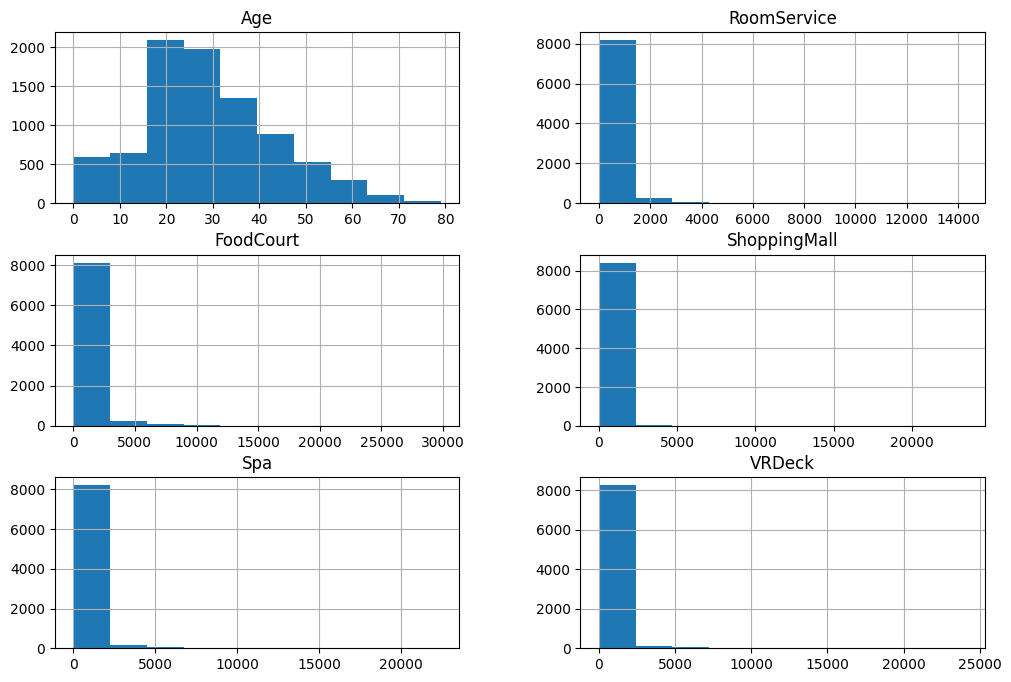

In [7]:
import matplotlib.pyplot as plt

# This is used to viualize the data distribution and scale

train.hist(figsize=(12,8))
plt.show()

# 🔶 Prepare the Data for ML
#  🔸 Preliminary Steps
* 🟢 Creating common Functions for operations
* 🟢 Make a copy of training set and seperate category and label